In [179]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.style.use('seaborn-white')
#plt.style.available
#plt.style.use('seaborn-dark-palette')

### Load the interactions summary from Human Promoter Analysis

In [180]:
#df = pd.read_csv('DFIM_Human-Promoter_experiment/Interactions_1000_v10/interactions_summary_attnLimit-0.txt',sep='\t')
#df = pd.read_csv('DFIM_Human-Promoter_experiment/Interactions/interactions_summary_attnLimit-0.txt',sep='\t')

df = pd.read_csv('DFIM_Human-Promoter_experiment_ATTN-model/Interactions/interactions_summary_attnLimit-0.txt',sep='\t')

In [181]:
df.shape

(5995, 12)

In [182]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval
0,filter0<-->filter2,1,M5335_1.02,0.048945,M0891_1.02,0.004845,253.0,326.0,39.0,227.0,0.325317,0.450126
1,filter0<-->filter3,2,M5335_1.02,0.048945,M0931_1.02,0.011151,91.0,104.0,25.0,224.0,0.990451,0.997620
2,filter0<-->filter4,3,M5335_1.02,0.048945,M0891_1.02,0.004597,112.0,277.0,42.0,277.0,0.897034,0.940862
3,filter0<-->filter5,4,M5335_1.02,0.048945,M1605_1.02,0.007457,72.0,173.0,36.0,231.0,0.970929,0.987648
4,filter0<-->filter6,5,M5335_1.02,0.048945,M0891_1.02,0.003579,154.0,72.0,67.0,205.0,0.033485,0.074729


In [183]:
#df = df[(df['motif1_qval'] < 0.01) & (df['motif2_qval']<0.01)]

##### keep significant interactions

In [184]:
df = df[df['adjusted_pval']<0.05]

In [185]:
df.shape

(2322, 12)

In [186]:
df = df[(df['motif1_qval'] < 0.05) & (df['motif2_qval']<0.05)]

In [187]:
df.shape

(2322, 12)

### Load the motif description file to annotate the interactions. 
Here I am using CISBP (U toronto) motif description file. 

In [188]:
df_annotate = pd.read_csv('../Basset_Splicing_IR-iDiffIR/Analysis_For_none_network-typeB_lotus_posThresh-0.60/MEME_analysis/Homo_sapiens_2019_01_14_4_17_pm/TF_Information_all_motifs.txt',sep='\t')

In [189]:
df_annotate.head()

,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,TF_Status,Family_Name,...,MSource_Type,MSource_Author,MSource_Year,PMID,MSource_Version,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
0,T004843_1.02,F035_1.02,TS19_1.02,M2938_1.02,MS26_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,Transfac,Matys,2006,16381825,2014.2,Ensembl,http://www.ensembl.org/,2011,Oct,26
1,T004843_1.02,F035_1.02,TS19_1.02,M5917_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
2,T004843_1.02,F035_1.02,TS19_1.02,M5918_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
3,T004843_1.02,F035_1.02,TS19_1.02,M5919_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
4,T004843_1.02,F035_1.02,TS19_1.02,M6144_1.02,MS18_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,HocoMoco,Kulakovskiy,2013,23175603,July 2014,Ensembl,http://www.ensembl.org/,2011,Oct,26


In [190]:
def get_annotation(motif_A, annotation_data=None, single_TF = False):
    #motif_A, motif_B = interaction.split('<-->')
    #print(motif_A)
    #print('there')
    TF_A = annotation_data[annotation_data['Motif_ID']==motif_A]['TF_Name']
    #TF_B = annotation_data[annotation_data['Motif_ID']==motif_B]['TF_Name']
    
    ##--If there is no annotation for a given motif--##
    #if len(TF_A)==0:
    TF_A = list(TF_A)
    #if len(TF_B)==0:
    #    TF_B = pd.Series([motif_B])
    ###################################################
    
    if single_TF:
        return TF_A[0]
    else:
        return ','.join(TF_A)
    #print('here')
    #return TF_A

In [191]:
df['TF1'] = df['motif1'].apply(get_annotation, annotation_data = df_annotate,single_TF=True)
df['TF2'] = df['motif2'].apply(get_annotation, annotation_data = df_annotate,single_TF=True)

In [192]:
df['TF_interaction'] = df.apply(lambda x: x['TF1']+r'$\longleftrightarrow$'+x['TF2'], axis=1)

In [193]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
33,filter0<-->filter58,57,M5335_1.02,0.048945,M0609_1.02,0.002026,170.0,15.0,57.0,179.0,0.001931,0.007227,CUX2,DNMT1,CUX2$\longleftrightarrow$DNMT1
65,filter0<-->filter122,121,M5335_1.02,0.048945,M4604_1.02,0.028528,266.0,244.0,75.0,242.0,0.007247,0.021542,CUX2,ZNF263,CUX2$\longleftrightarrow$ZNF263
70,filter0<-->filter131,130,M5335_1.02,0.048945,M0408_1.02,0.005101,32.0,186.0,65.0,268.0,0.000725,0.003221,CUX2,ZKSCAN1,CUX2$\longleftrightarrow$ZKSCAN1
71,filter0<-->filter133,132,M5335_1.02,0.048945,M4459_1.02,0.000187,191.0,316.0,58.0,101.0,0.000083,0.000529,CUX2,EGR1,CUX2$\longleftrightarrow$EGR1
84,filter0<-->filter160,159,M5335_1.02,0.048945,M0609_1.02,0.006937,301.0,337.0,66.0,93.0,0.013399,0.035482,CUX2,DNMT1,CUX2$\longleftrightarrow$DNMT1


In [194]:
df = df[df['TF1']!=df['TF2']]

In [195]:
df.shape

(2160, 15)

#### Fix redundant interaction pairs
 fix A<->B vs B<->A

In [196]:
df = df.reset_index()

In [197]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
0,33,filter0<-->filter58,57,M5335_1.02,0.048945,M0609_1.02,0.002026,170.0,15.0,57.0,179.0,0.001931,0.007227,CUX2,DNMT1,CUX2$\longleftrightarrow$DNMT1
1,65,filter0<-->filter122,121,M5335_1.02,0.048945,M4604_1.02,0.028528,266.0,244.0,75.0,242.0,0.007247,0.021542,CUX2,ZNF263,CUX2$\longleftrightarrow$ZNF263
2,70,filter0<-->filter131,130,M5335_1.02,0.048945,M0408_1.02,0.005101,32.0,186.0,65.0,268.0,0.000725,0.003221,CUX2,ZKSCAN1,CUX2$\longleftrightarrow$ZKSCAN1
3,71,filter0<-->filter133,132,M5335_1.02,0.048945,M4459_1.02,0.000187,191.0,316.0,58.0,101.0,0.000083,0.000529,CUX2,EGR1,CUX2$\longleftrightarrow$EGR1
4,84,filter0<-->filter160,159,M5335_1.02,0.048945,M0609_1.02,0.006937,301.0,337.0,66.0,93.0,0.013399,0.035482,CUX2,DNMT1,CUX2$\longleftrightarrow$DNMT1


In [198]:
all_interactions_dict = []
for i in range(df.shape[0]):
    TF1 = df['TF1'][i]
    TF2 = df['TF2'][i]
    TF_intr = TF1+r'$\longleftrightarrow$'+TF2
    TF_intr_rev = TF2+r'$\longleftrightarrow$'+TF1
    if TF_intr not in all_interactions_dict and TF_intr_rev not in all_interactions_dict:
        all_interactions_dict.append(TF_intr)
    elif TF_intr in all_interactions_dict:
        df['TF_interaction'][i] = TF_intr
    elif TF_intr_rev in all_interactions_dict:
        df['TF_interaction'][i] = TF_intr_rev

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [199]:
df.head(10)

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
0,33,filter0<-->filter58,57,M5335_1.02,0.048945,M0609_1.02,0.002026,170.0,15.0,57.0,179.0,0.001931,0.007227,CUX2,DNMT1,CUX2$\longleftrightarrow$DNMT1
1,65,filter0<-->filter122,121,M5335_1.02,0.048945,M4604_1.02,0.028528,266.0,244.0,75.0,242.0,0.007247,0.021542,CUX2,ZNF263,CUX2$\longleftrightarrow$ZNF263
2,70,filter0<-->filter131,130,M5335_1.02,0.048945,M0408_1.02,0.005101,32.0,186.0,65.0,268.0,0.000725,0.003221,CUX2,ZKSCAN1,CUX2$\longleftrightarrow$ZKSCAN1
3,71,filter0<-->filter133,132,M5335_1.02,0.048945,M4459_1.02,0.000187,191.0,316.0,58.0,101.0,0.000083,0.000529,CUX2,EGR1,CUX2$\longleftrightarrow$EGR1
4,84,filter0<-->filter160,159,M5335_1.02,0.048945,M0609_1.02,0.006937,301.0,337.0,66.0,93.0,0.013399,0.035482,CUX2,DNMT1,CUX2$\longleftrightarrow$DNMT1
5,88,filter0<-->filter166,165,M5335_1.02,0.048945,M0607_1.02,0.001110,129.0,366.0,48.0,163.0,0.012056,0.032500,CUX2,KDM2B,CUX2$\longleftrightarrow$KDM2B
6,89,filter0<-->filter168,167,M5335_1.02,0.048945,M0609_1.02,0.013716,210.0,240.0,33.0,131.0,0.003932,0.012991,CUX2,DNMT1,CUX2$\longleftrightarrow$DNMT1
7,92,filter0<-->filter171,170,M5335_1.02,0.048945,M0608_1.02,0.000047,148.0,342.0,87.0,301.0,0.016474,0.041986,CUX2,MLL,CUX2$\longleftrightarrow$MLL
8,104,filter0<-->filter191,190,M5335_1.02,0.048945,M4459_1.02,0.003340,374.0,67.0,81.0,181.0,0.014941,0.038796,CUX2,EGR1,CUX2$\longleftrightarrow$EGR1
9,105,filter0<-->filter192,191,M5335_1.02,0.048945,M4459_1.02,0.007898,492.0,188.0,52.0,156.0,0.009109,0.025802,CUX2,EGR1,CUX2$\longleftrightarrow$EGR1


In [200]:
df.shape

(2160, 16)

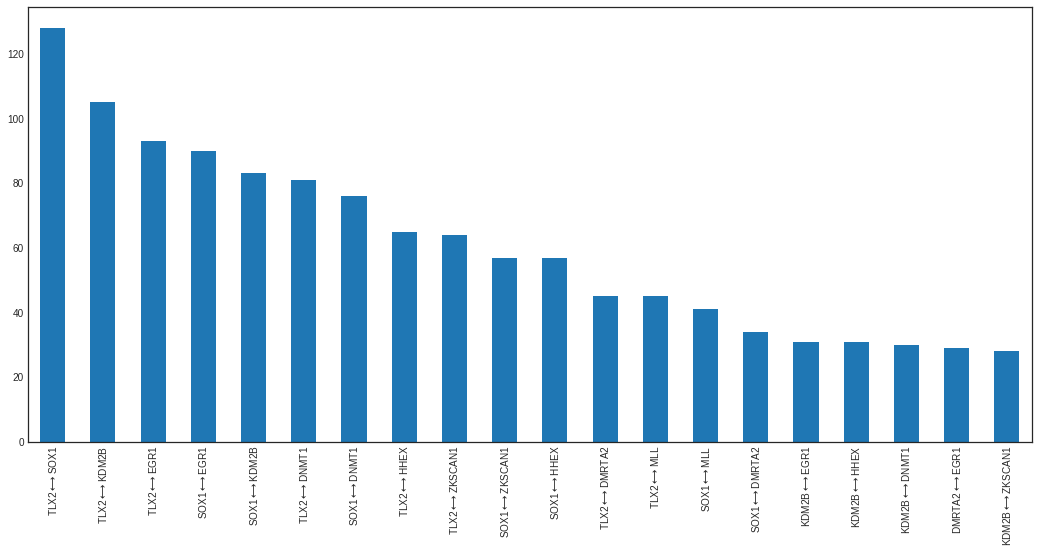

In [201]:
df['TF_interaction'].value_counts()[:20].plot(kind='bar', figsize=(18,8))

### Distribution of mean distance of interaction

Text(0.5, 1.0, 'Distribution of motif interaction distances')

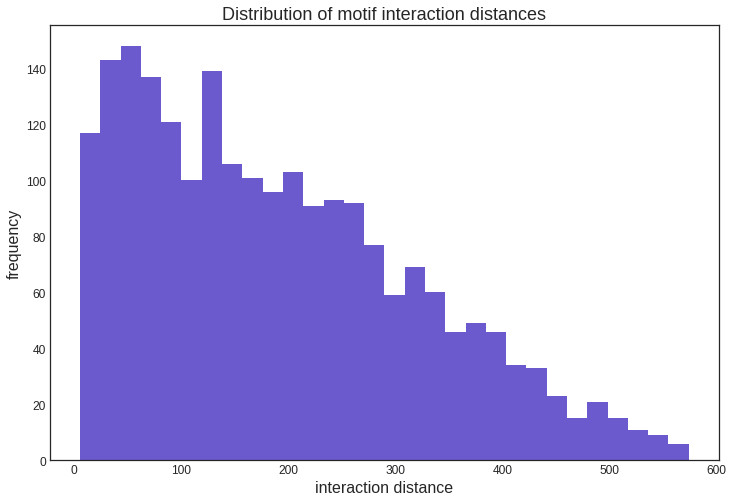

In [202]:
ax = df['mean_distance'].plot(kind='hist',bins=30, figsize=(12,8),color='slateblue',fontsize=12)
ax.set_xlabel("interaction distance",fontsize=16)
ax.set_ylabel("frequency",fontsize=16)
ax.xaxis.set_tick_params(rotation=0)
ax.set_title('Distribution of motif interaction distances',fontsize=18)

In [203]:
df['mean_distance'].mean(),df['mean_distance'].median()

(192.24583333333334, 170.0)

### Most Frequent TF Family Interactions

In [204]:
tf_family_dict = {}
for TF in df_annotate['TF_Name']:
    tf_family_dict[TF] = df_annotate[df_annotate['TF_Name']==TF]['Family_Name'].iloc[0]

In [205]:
df['TF1_Family'] = df['TF1'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')
df['TF2_Family'] = df['TF2'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [206]:
df.head(10)

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family
0,33,filter0<-->filter58,57,M5335_1.02,0.048945,M0609_1.02,0.002026,170.0,15.0,57.0,179.0,0.001931,0.007227,CUX2,DNMT1,CUX2$\longleftrightarrow$DNMT1,"CUT,Homeodomain",CxxC
1,65,filter0<-->filter122,121,M5335_1.02,0.048945,M4604_1.02,0.028528,266.0,244.0,75.0,242.0,0.007247,0.021542,CUX2,ZNF263,CUX2$\longleftrightarrow$ZNF263,"CUT,Homeodomain",C2H2 ZF
2,70,filter0<-->filter131,130,M5335_1.02,0.048945,M0408_1.02,0.005101,32.0,186.0,65.0,268.0,0.000725,0.003221,CUX2,ZKSCAN1,CUX2$\longleftrightarrow$ZKSCAN1,"CUT,Homeodomain",C2H2 ZF
3,71,filter0<-->filter133,132,M5335_1.02,0.048945,M4459_1.02,0.000187,191.0,316.0,58.0,101.0,0.000083,0.000529,CUX2,EGR1,CUX2$\longleftrightarrow$EGR1,"CUT,Homeodomain",C2H2 ZF
4,84,filter0<-->filter160,159,M5335_1.02,0.048945,M0609_1.02,0.006937,301.0,337.0,66.0,93.0,0.013399,0.035482,CUX2,DNMT1,CUX2$\longleftrightarrow$DNMT1,"CUT,Homeodomain",CxxC
5,88,filter0<-->filter166,165,M5335_1.02,0.048945,M0607_1.02,0.001110,129.0,366.0,48.0,163.0,0.012056,0.032500,CUX2,KDM2B,CUX2$\longleftrightarrow$KDM2B,"CUT,Homeodomain",CxxC
6,89,filter0<-->filter168,167,M5335_1.02,0.048945,M0609_1.02,0.013716,210.0,240.0,33.0,131.0,0.003932,0.012991,CUX2,DNMT1,CUX2$\longleftrightarrow$DNMT1,"CUT,Homeodomain",CxxC
7,92,filter0<-->filter171,170,M5335_1.02,0.048945,M0608_1.02,0.000047,148.0,342.0,87.0,301.0,0.016474,0.041986,CUX2,MLL,CUX2$\longleftrightarrow$MLL,"CUT,Homeodomain",CxxC
8,104,filter0<-->filter191,190,M5335_1.02,0.048945,M4459_1.02,0.003340,374.0,67.0,81.0,181.0,0.014941,0.038796,CUX2,EGR1,CUX2$\longleftrightarrow$EGR1,"CUT,Homeodomain",C2H2 ZF
9,105,filter0<-->filter192,191,M5335_1.02,0.048945,M4459_1.02,0.007898,492.0,188.0,52.0,156.0,0.009109,0.025802,CUX2,EGR1,CUX2$\longleftrightarrow$EGR1,"CUT,Homeodomain",C2H2 ZF


In [207]:
df.shape

(2160, 18)

In [208]:
df['Family_Interaction'] = df.apply(lambda x: x['TF1_Family']+r'$\longleftrightarrow$'+x['TF2_Family'],axis=1)

In [209]:
all_interactions_dict = []
for i in range(df.shape[0]):
    TF1 = df['TF1_Family'][i]
    TF2 = df['TF2_Family'][i]
    TF_intr = TF1+r'$\longleftrightarrow$'+TF2
    TF_intr_rev = TF2+r'$\longleftrightarrow$'+TF1
    if TF_intr not in all_interactions_dict and TF_intr_rev not in all_interactions_dict:
        all_interactions_dict.append(TF_intr)
    elif TF_intr in all_interactions_dict:
        df['Family_Interaction'][i] = TF_intr
    elif TF_intr_rev in all_interactions_dict:
        df['Family_Interaction'][i] = TF_intr_rev

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [210]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family,Family_Interaction
0,33,filter0<-->filter58,57,M5335_1.02,0.048945,M0609_1.02,0.002026,170.0,15.0,57.0,179.0,0.001931,0.007227,CUX2,DNMT1,CUX2$\longleftrightarrow$DNMT1,"CUT,Homeodomain",CxxC,"CUT,Homeodomain$\longleftrightarrow$CxxC"
1,65,filter0<-->filter122,121,M5335_1.02,0.048945,M4604_1.02,0.028528,266.0,244.0,75.0,242.0,0.007247,0.021542,CUX2,ZNF263,CUX2$\longleftrightarrow$ZNF263,"CUT,Homeodomain",C2H2 ZF,"CUT,Homeodomain$\longleftrightarrow$C2H2 ZF"
2,70,filter0<-->filter131,130,M5335_1.02,0.048945,M0408_1.02,0.005101,32.0,186.0,65.0,268.0,0.000725,0.003221,CUX2,ZKSCAN1,CUX2$\longleftrightarrow$ZKSCAN1,"CUT,Homeodomain",C2H2 ZF,"CUT,Homeodomain$\longleftrightarrow$C2H2 ZF"
3,71,filter0<-->filter133,132,M5335_1.02,0.048945,M4459_1.02,0.000187,191.0,316.0,58.0,101.0,0.000083,0.000529,CUX2,EGR1,CUX2$\longleftrightarrow$EGR1,"CUT,Homeodomain",C2H2 ZF,"CUT,Homeodomain$\longleftrightarrow$C2H2 ZF"
4,84,filter0<-->filter160,159,M5335_1.02,0.048945,M0609_1.02,0.006937,301.0,337.0,66.0,93.0,0.013399,0.035482,CUX2,DNMT1,CUX2$\longleftrightarrow$DNMT1,"CUT,Homeodomain",CxxC,"CUT,Homeodomain$\longleftrightarrow$CxxC"


In [211]:
#df.to_csv('Human-promoter_all_significant_TFs.csv')

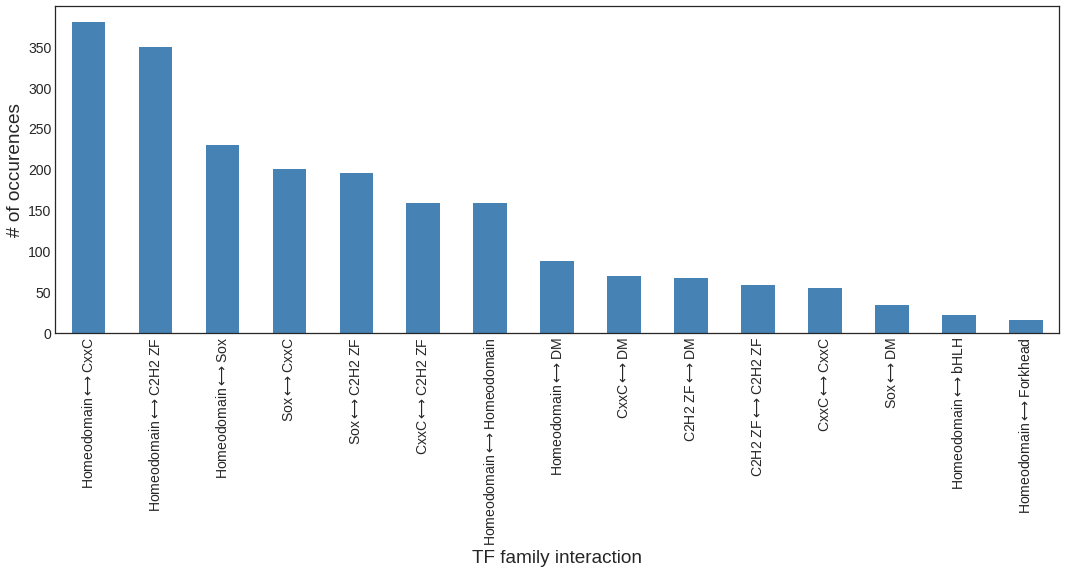

In [212]:
ax = df['Family_Interaction'].value_counts()[:15].plot(kind='bar',color='steelblue',figsize=(18,6),fontsize=14)
ax.set_xlabel("TF family interaction",fontsize=19)
ax.set_ylabel("# of occurences",fontsize=19)
ax.xaxis.set_tick_params(rotation=90)
#ax.set_title('Top interacting families of transcription factors',fontsize=18)
plt.savefig('DFIM_Family_interactions_Human.pdf',bbox_inches='tight')

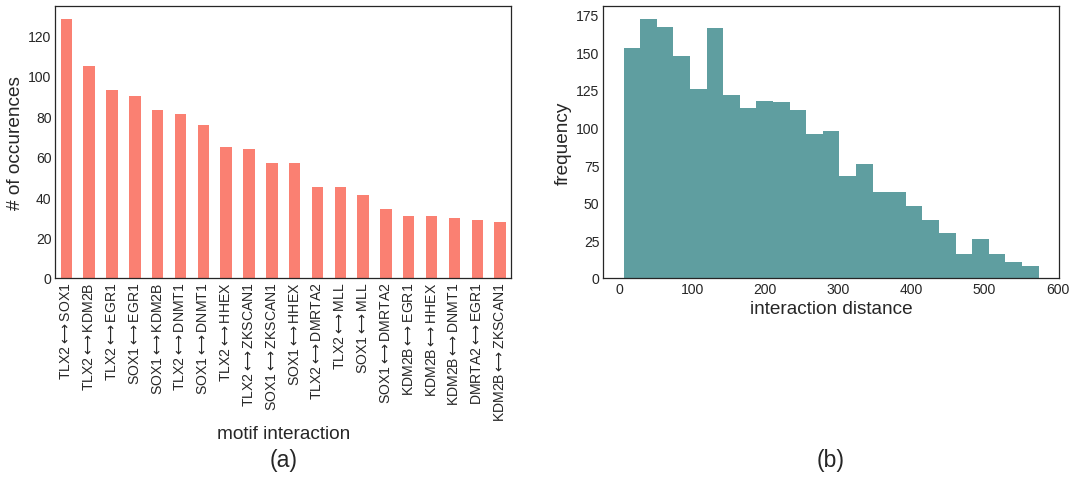

In [213]:
fig, axes = plt.subplots(1, 2)
ax1 = df['TF_interaction'].value_counts()[:20].plot(kind='bar',color='salmon',figsize=(18,5),fontsize=14,ax=axes[0])
ax1.set_xlabel("motif interaction",fontsize=19)
ax1.set_ylabel("# of occurences",fontsize=19)
ax1.xaxis.set_tick_params(rotation=90)
#ax1.set_title('Most frequent interactions',fontsize=16)

ax2 = df['mean_distance'].plot(kind='hist',bins=25, figsize=(18,5),color='cadetblue',fontsize=14,ax=axes[1])
ax2.set_xlabel("interaction distance",fontsize=19)
ax2.set_ylabel("frequency",fontsize=19)
ax2.xaxis.set_tick_params(rotation=0)
#ax2.set_title('Distribution of motif interaction distances',fontsize=16)

ax1.text(0.5,-0.69, "(a)", size=23, ha="center", 
         transform=ax1.transAxes)
ax2.text(0.5,-0.69, "(b)", size=23, ha="center", 
         transform=ax2.transAxes)
#df_list[count].plot(ax=axes[1,1])
plt.savefig('DFIM_Main_Human.pdf',bbox_inches='tight')

In [214]:
len(df['TF_interaction'].value_counts()),np.median(df['TF_interaction'].value_counts())

(184, 4.0)

In [215]:
df['motifsOnlyInt'] = df['TF1']+':'+df['TF2']
df['familyOnlyInt'] = df['TF1_Family']+':'+df['TF2_Family']
df.to_csv('DFIM_Human-Promoter_Final.txt',sep='\t')

In [216]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,...,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family,Family_Interaction,motifsOnlyInt,familyOnlyInt
0,33,filter0<-->filter58,57,M5335_1.02,0.048945,M0609_1.02,0.002026,170.0,15.0,57.0,...,0.001931,0.007227,CUX2,DNMT1,CUX2$\longleftrightarrow$DNMT1,"CUT,Homeodomain",CxxC,"CUT,Homeodomain$\longleftrightarrow$CxxC",CUX2:DNMT1,"CUT,Homeodomain:CxxC"
1,65,filter0<-->filter122,121,M5335_1.02,0.048945,M4604_1.02,0.028528,266.0,244.0,75.0,...,0.007247,0.021542,CUX2,ZNF263,CUX2$\longleftrightarrow$ZNF263,"CUT,Homeodomain",C2H2 ZF,"CUT,Homeodomain$\longleftrightarrow$C2H2 ZF",CUX2:ZNF263,"CUT,Homeodomain:C2H2 ZF"
2,70,filter0<-->filter131,130,M5335_1.02,0.048945,M0408_1.02,0.005101,32.0,186.0,65.0,...,0.000725,0.003221,CUX2,ZKSCAN1,CUX2$\longleftrightarrow$ZKSCAN1,"CUT,Homeodomain",C2H2 ZF,"CUT,Homeodomain$\longleftrightarrow$C2H2 ZF",CUX2:ZKSCAN1,"CUT,Homeodomain:C2H2 ZF"
3,71,filter0<-->filter133,132,M5335_1.02,0.048945,M4459_1.02,0.000187,191.0,316.0,58.0,...,0.000083,0.000529,CUX2,EGR1,CUX2$\longleftrightarrow$EGR1,"CUT,Homeodomain",C2H2 ZF,"CUT,Homeodomain$\longleftrightarrow$C2H2 ZF",CUX2:EGR1,"CUT,Homeodomain:C2H2 ZF"
4,84,filter0<-->filter160,159,M5335_1.02,0.048945,M0609_1.02,0.006937,301.0,337.0,66.0,...,0.013399,0.035482,CUX2,DNMT1,CUX2$\longleftrightarrow$DNMT1,"CUT,Homeodomain",CxxC,"CUT,Homeodomain$\longleftrightarrow$CxxC",CUX2:DNMT1,"CUT,Homeodomain:CxxC"


### Annotate Interactions using TRUSTv2 (and other sources)

In [217]:
#dictionaries with genes/TFs as keys and [target_gene/TF, role, PUBMID ID] as value
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/TRUSTv2/human_co-regulate_dict.pckl','rb') as f:
    human_dict = pickle.load(f)

    
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/TRUSTv2/mouse_co-regulate_dict.pckl','rb') as f:
    mouse_dict = pickle.load(f)  

In [218]:
def annotate_interaction(x, intr_dict = None):
    TFs_A,TFs_B = x.split(r'$\longleftrightarrow$')
    TFs_A = TFs_A.split(',')
    TFs_B = TFs_B.split(',')
    
    for TF_A in TFs_A:
        if TF_A not in intr_dict:
            continue
        for TF_B in TFs_B:
            if TF_B not in intr_dict:
                continue
            TF_A_targets = intr_dict[TF_A][:,0]
            TF_B_targets = intr_dict[TF_B][:,0]
            if len(set.intersection(set(TF_A_targets),set(TF_B_targets))) != 0:
                return 1 #interaction found (the two TFs have shared targets)
            
    
    return 0

In [219]:
df['Interaction_in_TRUSTv2'] = df['TF_interaction'].apply(annotate_interaction, intr_dict = human_dict)

In [220]:
df['Interaction_in_TRUSTv2'].value_counts()

0    2144
1      16
Name: Interaction_in_TRUSTv2, dtype: int64

In [221]:
df_resTRUSTv2 = df[df['Interaction_in_TRUSTv2']==1][df.columns[[0,1,3,4,5,6,7,8,12,13,14,15,16,17,18]]]

In [233]:
df_resTRUSTv2[['TF_interaction','TF1_Family','TF2_Family','adjusted_pval']].sort_values(by='adjusted_pval').drop_duplicates('TF_interaction')

,TF_interaction,TF1_Family,TF2_Family,adjusted_pval
1033,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,5.048190e-14


In [234]:
#df_resTRUSTv2